In [11]:
#Basic error bars
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

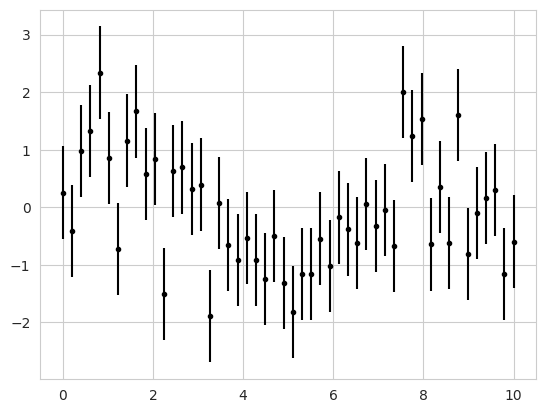

In [4]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

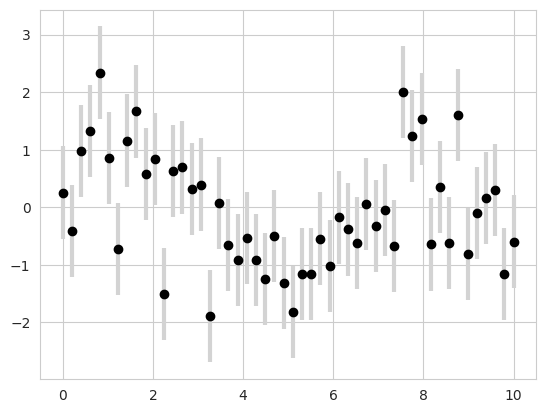

In [5]:
#Customizing error bars.
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgrey', elinewidth=3, capsize=0);

In [7]:
#Continous Errors
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

#define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

#Compute the Gaussian process fit
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 100)
yfit, MSE = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(MSE)

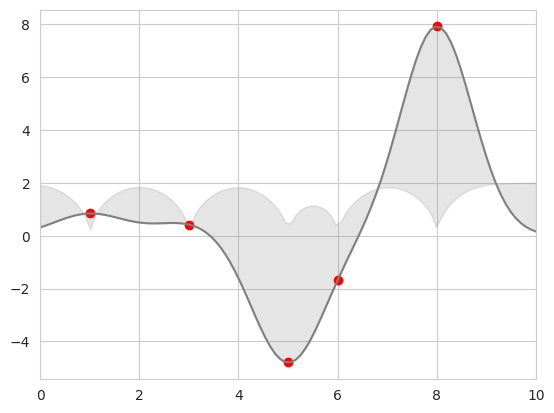

In [8]:
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='grey')

plt.fill_between(xfit, yfit, dyfit, yfit + dyfit,
                color='gray', alpha=0.2)
plt.xlim(0, 10);

In [12]:
sns.set_style('white')

In [13]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [14]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

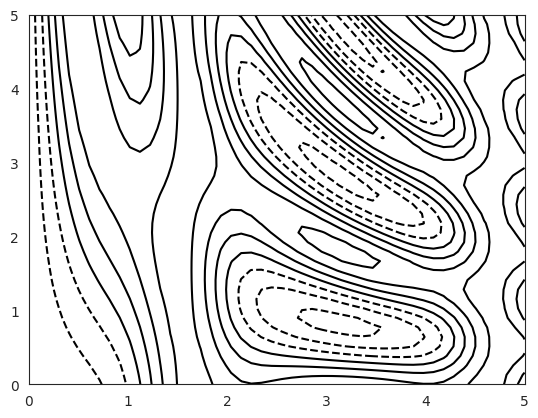

In [16]:
plt.contour(X, Y, Z, colors='Black')

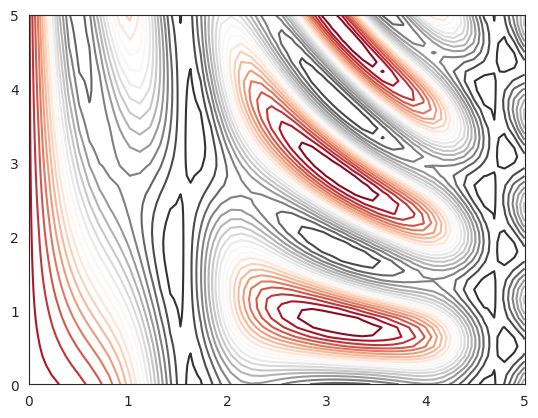

In [18]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

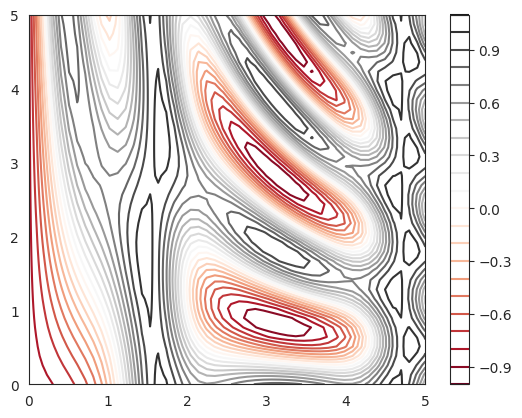

In [20]:
plt.contour(X, Y, Z, 20, cmap='RdGy');
plt.colorbar();

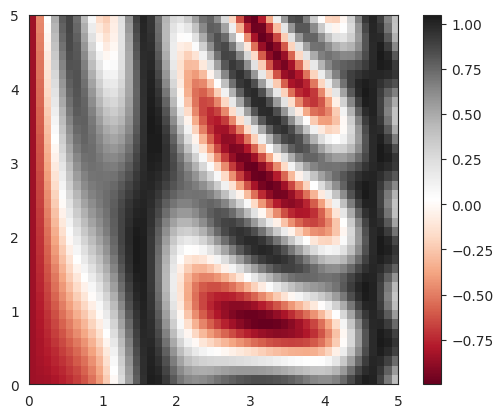

In [22]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
          cmap='RdGy')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

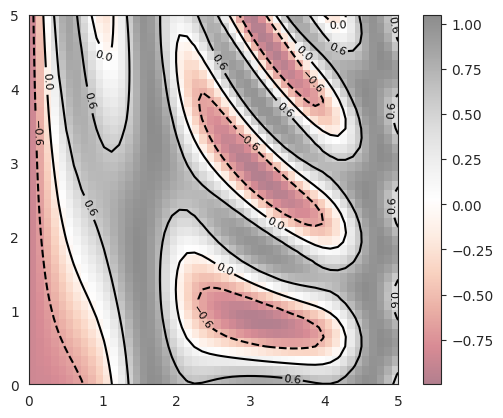

In [24]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
          cmap='RdGy', alpha=0.5)
plt.colorbar()